In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from scipy.stats import multivariate_normal

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.mixture import BayesianGaussianMixture

from sklearn import naive_bayes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
def asy1(estimator, X, y):
    Penalty_1 = np.array([[-10,10], [1,0]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_1[y, answ])
    
def asy2(estimator, X, y):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_2[y, answ])

def num(estimator, X, y):
    answ = np.int64(estimator.predict(X))
    return np.sum(np.abs(answ - y) > 0)

def _num(y1, y2):
    return np.sum(np.abs(y1 - y2) > 0)

def _acc(y1, y2):
    return np.sum(y1 == y2)

def _asy1(y1, y2):
    Penalty_1 = np.array([[-10,10], [1,0]])
    return np.sum(Penalty_1[y1, y2])

def _asy2(y1, y2):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    return np.sum(Penalty_2[y1, y2])


In [3]:
np.random.seed(0)

In [36]:
X_train_load = pd.read_csv('./data/task1_8_learn_X.csv',header=None, sep=' ').as_matrix()
y_train_load = np.reshape(np.int64(pd.read_csv('./data/task1_8_learn_y.csv',header=None, sep=' ').as_matrix()), -1)

X_test_load = pd.read_csv('./data/task1_8_test_X.csv',header=None, sep=' ').as_matrix()

In [37]:
print(X_train_load.shape)
print(y_train_load.shape)
print(X_test_load.shape)


(1000, 1500)
(1000,)
(10000, 1500)


In [38]:
# skb = SelectKBest(f_classif, k=1)
skb = SelectKBest(mutual_info_classif, k=1)
skb.fit(X_train_load, y_train_load)


SelectKBest(k=1, score_func=<function mutual_info_classif at 0x1144b4b70>)

In [39]:
np.sort(skb.scores_)[::-1][:20]

array([ 0.1200418 ,  0.11823991,  0.11615198,  0.11561795,  0.11537538,
        0.11464433,  0.11353325,  0.1096733 ,  0.10949409,  0.10917714,
        0.10733828,  0.10721401,  0.10595693,  0.10412811,  0.10358906,
        0.10232253,  0.10145067,  0.10129163,  0.10088612,  0.10020471])

In [40]:
skb.k = 20

In [41]:
# X = skb.transform(scale(np.vstack([X_train_load, X_test_load])))
X = skb.transform(np.vstack([X_train_load, X_test_load]))
X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train = X[:X_train_load.shape[0]]
X_test = X[X_train_load.shape[0]:]

y_train = np.array(y_train_load)




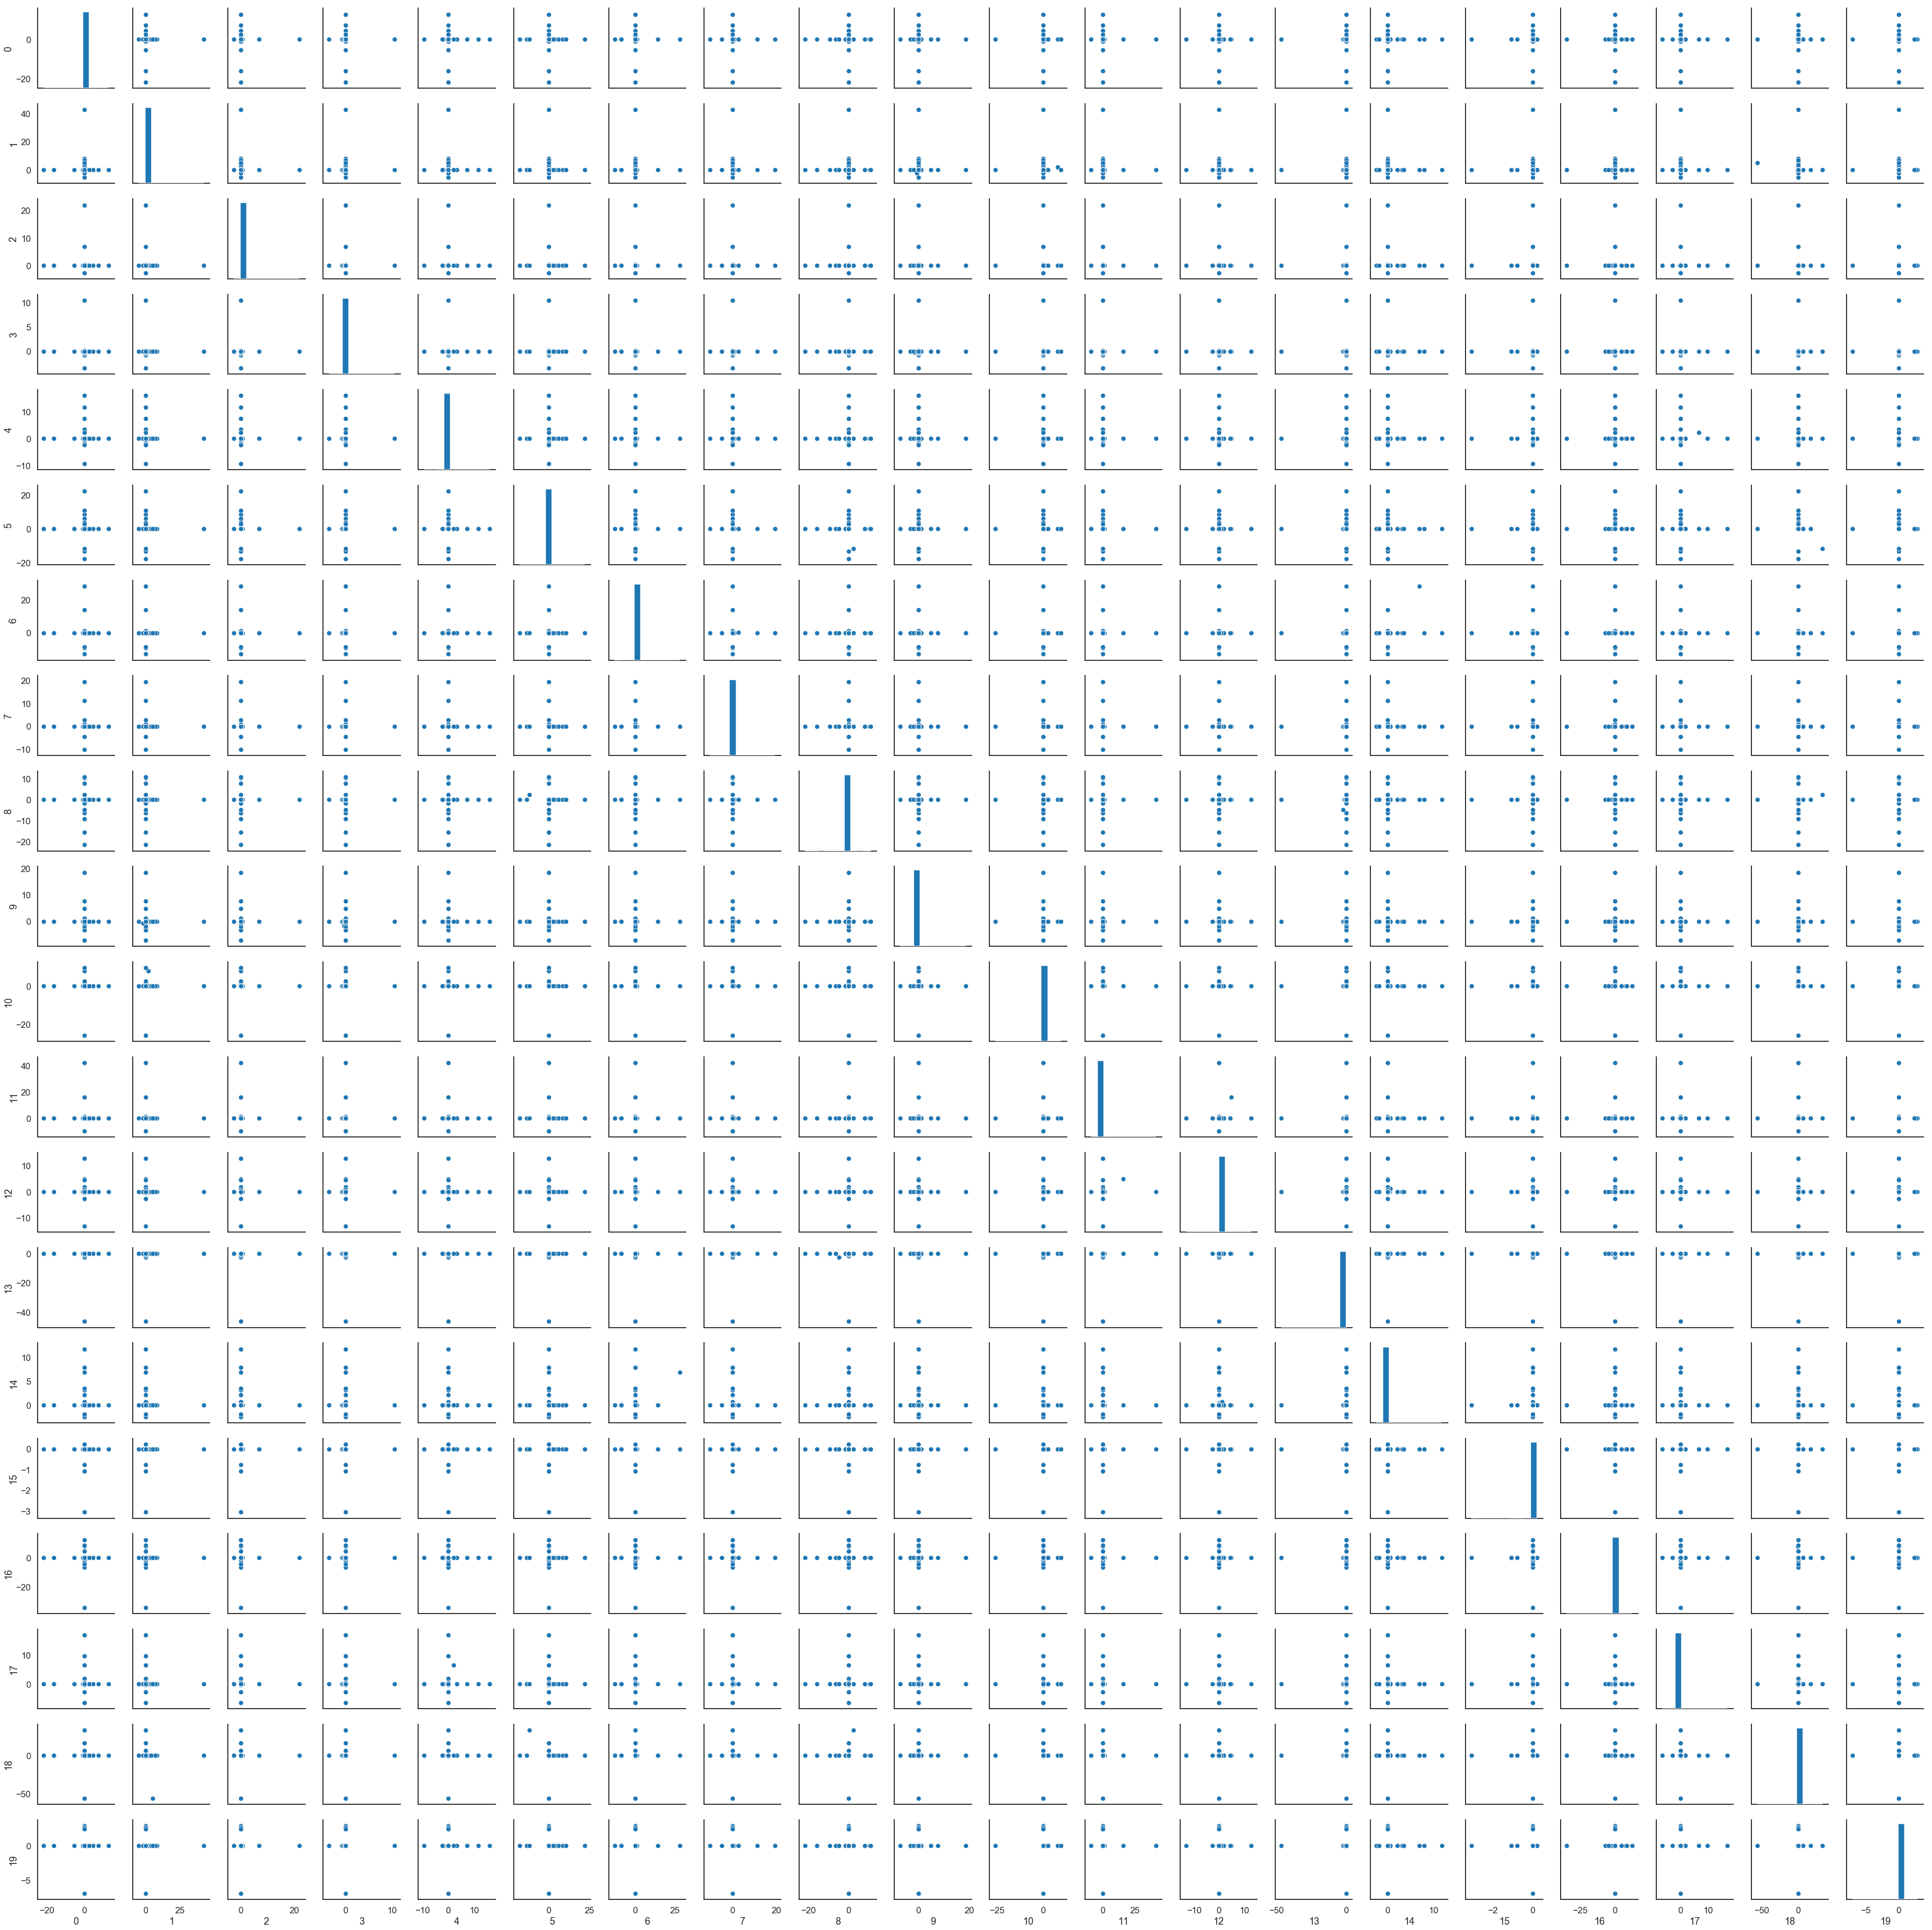

In [42]:
sns.pairplot(pd.DataFrame(X_train))

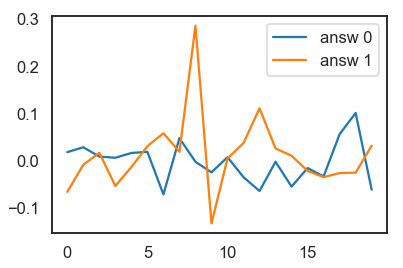

In [28]:
plt.plot(np.mean(X_train[np.where(y_train==0)], axis = 0), label = 'answ 0')
plt.plot(np.mean(X_train[np.where(y_train==1)], axis = 0), label = 'answ 1')

plt.legend(loc='best')
plt.savefig('Practise_8_FeatureMean.pdf')

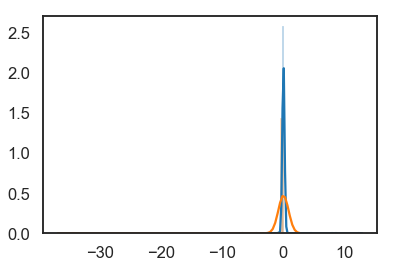

In [32]:
sns.distplot(X_train[np.where(y_train==0)][:,3])

sns.distplot(X_train[np.where(y_train==1)][:,3])

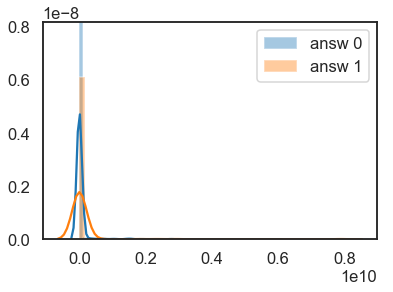

In [21]:
sns.distplot(np.sum(np.abs(X_train[np.where(y_train==0)]), axis = 1), label = 'answ 0')
sns.distplot(np.sum(np.abs(X_train[np.where(y_train==1)]), axis = 1), label = 'answ 1')

plt.legend(loc='best')
plt.savefig('Practise_8_Statistic.pdf')

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1000, 175)
(1000,)
(10000, 175)


In [13]:
print(_asy1(y_train, y_train), _asy2(y_train, y_train))
print(np.sum(y_train))

-7990 -1000
201


In [14]:
X_train_new = np.reshape(np.sum(np.abs(X_train), axis = 1), [-1,1])
X_test_new = np.reshape(np.sum(np.abs(X_test), axis = 1), [-1,1])

y_train_new = np.array(y_train)

# X_train_new_mini = np.array(X_train_new)
# y_train_new_mini = np.array(y_train_new)

In [15]:
# X_train_new = np.vstack([X_train_new, X_train_new[np.where(y_train_new == 1)]])
# y_train_new = np.hstack([y_train_new, y_train_new[np.where(y_train_new == 1)]])
# ind = np.random.choice(np.where(y_train_new == 0)[0], size = 201)
# X_train_new = np.vstack([X_train_new[np.where(y_train_new == 1)], X_train_new[ind]])
# y_train_new = np.hstack([y_train_new[np.where(y_train_new == 1)], y_train_new[ind]])

In [16]:
print(X_train_new.shape, y_train_new.shape)
print(np.sum(y_train_new))

(1000, 1) (1000,)
201


In [17]:
rho = 0.5
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_AUC = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)
Predict_For_NUM = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)



ACC 0.845
AUC 0.75479299373
NUM 155
ASY1 -7246
ASY2 -659


In [18]:
rho = 0.999
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_ASY1 = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)




ACC 0.839
AUC 0.75479299373
NUM 161
ASY1 -7810
ASY2 -677


In [19]:
rho = 0.66
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_ASY2 = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)



ACC 0.845
AUC 0.75479299373
NUM 155
ASY1 -7379
ASY2 -666


In [20]:
pd.DataFrame(np.vstack([Predict_For_AUC, Predict_For_NUM, Predict_For_ASY1, Predict_For_ASY2]).T).to_csv('task1_8_answ.csv', sep = ',')
